# 工业蒸汽量预测

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import os

warnings.filterwarnings('ignore')
data_path = os.environ.get('DATA_PATH') + 'AI_Cheats/'

In [2]:
plt.style.use('default')

In [3]:
train = pd.read_csv(data_path + 'Zhengqi/zhengqi_train.txt', sep='\t')
test = pd.read_csv(data_path + 'Zhengqi/zhengqi_test.txt', sep='\t')
train

V0     V1     V2     V3     V4     V5     V6     V7     V8     V9  \
0     0.566  0.016 -0.143  0.407  0.452 -0.901 -1.812 -2.360 -0.436 -2.114   
1     0.968  0.437  0.066  0.566  0.194 -0.893 -1.566 -2.360  0.332 -2.114   
2     1.013  0.568  0.235  0.370  0.112 -0.797 -1.367 -2.360  0.396 -2.114   
3     0.733  0.368  0.283  0.165  0.599 -0.679 -1.200 -2.086  0.403 -2.114   
4     0.684  0.638  0.260  0.209  0.337 -0.454 -1.073 -2.086  0.314 -2.114   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
2883  0.190 -0.025 -0.138  0.161  0.600 -0.212  0.757  0.584 -0.026  0.904   
2884  0.507  0.557  0.296  0.183  0.530 -0.237  0.749  0.584  0.537  0.904   
2885 -0.394 -0.721 -0.485  0.084  0.136  0.034  0.655  0.614 -0.818  0.904   
2886 -0.219 -0.282 -0.344 -0.049  0.449 -0.140  0.560  0.583 -0.596  0.904   
2887  0.368  0.380 -0.225 -0.049  0.379  0.092  0.550  0.551  0.244  0.904   

      ...    V29    V30    V31    V32    V33    V34    V35    V36    V37  \
0     ...  0.136  0.109 -0.615  0.327 -4.627 -4.789 -5.101 -2.608 -3.508   
1     ... -0.128  0.124  0.032  0.600 -0.843  0.160  0.364 -0.335 -0.730   
2     ... -0.009  0.361  0.277 -0.116 -0.843  0.160  0.364  0.765 -0.589   
3     ...  0.015  0.417  0.279  0.603 -0.843 -0.065  0.364  0.333 -0.112   
4     ...  0.183  1.078  0.328  0.418 -0.843 -0.215  0.364 -0.280 -0.028   
...   ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
2883  ...  0.128 -0.208  0.809 -0.173  0.247 -0.027 -0.349  0.576  0.686   
2884  ...  0.291 -0.287  0.465 -0.310  0.763  0.498 -0.349 -0.615 -0.380   
2885  ...  0.291 -0.179  0.268  0.552  0.763  0.498 -0.349  0.951  0.748   
2886  ...  0.216  1.061 -0.051  1.023  0.878  0.610 -0.230 -0.301  0.555   
2887  ...  0.047  0.057 -0.042  0.847  0.534 -0.009 -0.190 -0.567  0.388   

      target  
0      0.175  
1      0.676  
2      0.633  
3      0.206  
4      0.384  
...      ...  
2883   0.235  
2884   1.042  
2885   0.005  
2886   0.350  
2887   0.417  

[2888 rows x 39 columns]

In [4]:
train.describe()

V0           V1           V2           V3           V4  \
count  2888.000000  2888.000000  2888.000000  2888.000000  2888.000000   
mean      0.123048     0.056068     0.289720    -0.067790     0.012921   
std       0.928031     0.941515     0.911236     0.970298     0.888377   
min      -4.335000    -5.122000    -3.420000    -3.956000    -4.742000   
25%      -0.297000    -0.226250    -0.313000    -0.652250    -0.385000   
50%       0.359000     0.272500     0.386000    -0.044500     0.110000   
75%       0.726000     0.599000     0.918250     0.624000     0.550250   
max       2.121000     1.918000     2.828000     2.457000     2.689000   

                V5           V6           V7           V8           V9  ...  \
count  2888.000000  2888.000000  2888.000000  2888.000000  2888.000000  ...   
mean     -0.558565     0.182892     0.116155     0.177856    -0.169452  ...   
std       0.517957     0.918054     0.955116     0.895444     0.953813  ...   
min      -2.182000    -4.576000    -5.048000    -4.692000   -12.891000  ...   
25%      -0.853000    -0.310000    -0.295000    -0.159000    -0.390000  ...   
50%      -0.466000     0.388000     0.344000     0.362000     0.042000  ...   
75%      -0.154000     0.831250     0.782250     0.726000     0.042000  ...   
max       0.489000     1.895000     1.918000     2.245000     1.335000  ...   

               V29          V30          V31          V32          V33  \
count  2888.000000  2888.000000  2888.000000  2888.000000  2888.000000   
mean      0.097648     0.055477     0.127791     0.020806     0.007801   
std       1.061200     0.901934     0.873028     0.902584     1.006995   
min      -2.912000    -4.507000    -5.859000    -4.053000    -4.627000   
25%      -0.664000    -0.283000    -0.170250    -0.407250    -0.499000   
50%      -0.023000     0.053500     0.299500     0.039000    -0.040000   
75%       0.745250     0.488000     0.635000     0.557000     0.462000   
max       4.580000     2.689000     2.013000     2.395000     5.465000   

               V34          V35          V36          V37       target  
count  2888.000000  2888.000000  2888.000000  2888.000000  2888.000000  
mean      0.006715     0.197764     0.030658    -0.130330     0.126353  
std       1.003291     0.985675     0.970812     1.017196     0.983966  
min      -4.789000    -5.695000    -2.608000    -3.630000    -3.044000  
25%      -0.290000    -0.202500    -0.413000    -0.798250    -0.350250  
50%       0.160000     0.364000     0.137000    -0.185500     0.313000  
75%       0.273000     0.602000     0.644250     0.495250     0.793250  
max       5.110000     2.324000     5.238000     3.000000     2.538000  

[8 rows x 39 columns]

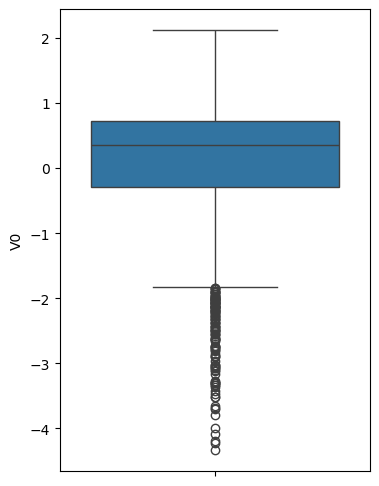

In [5]:
# 箱线图呈现
plt.figure(figsize=(4, 6))
sns.boxplot(train['V0'])
plt.show()

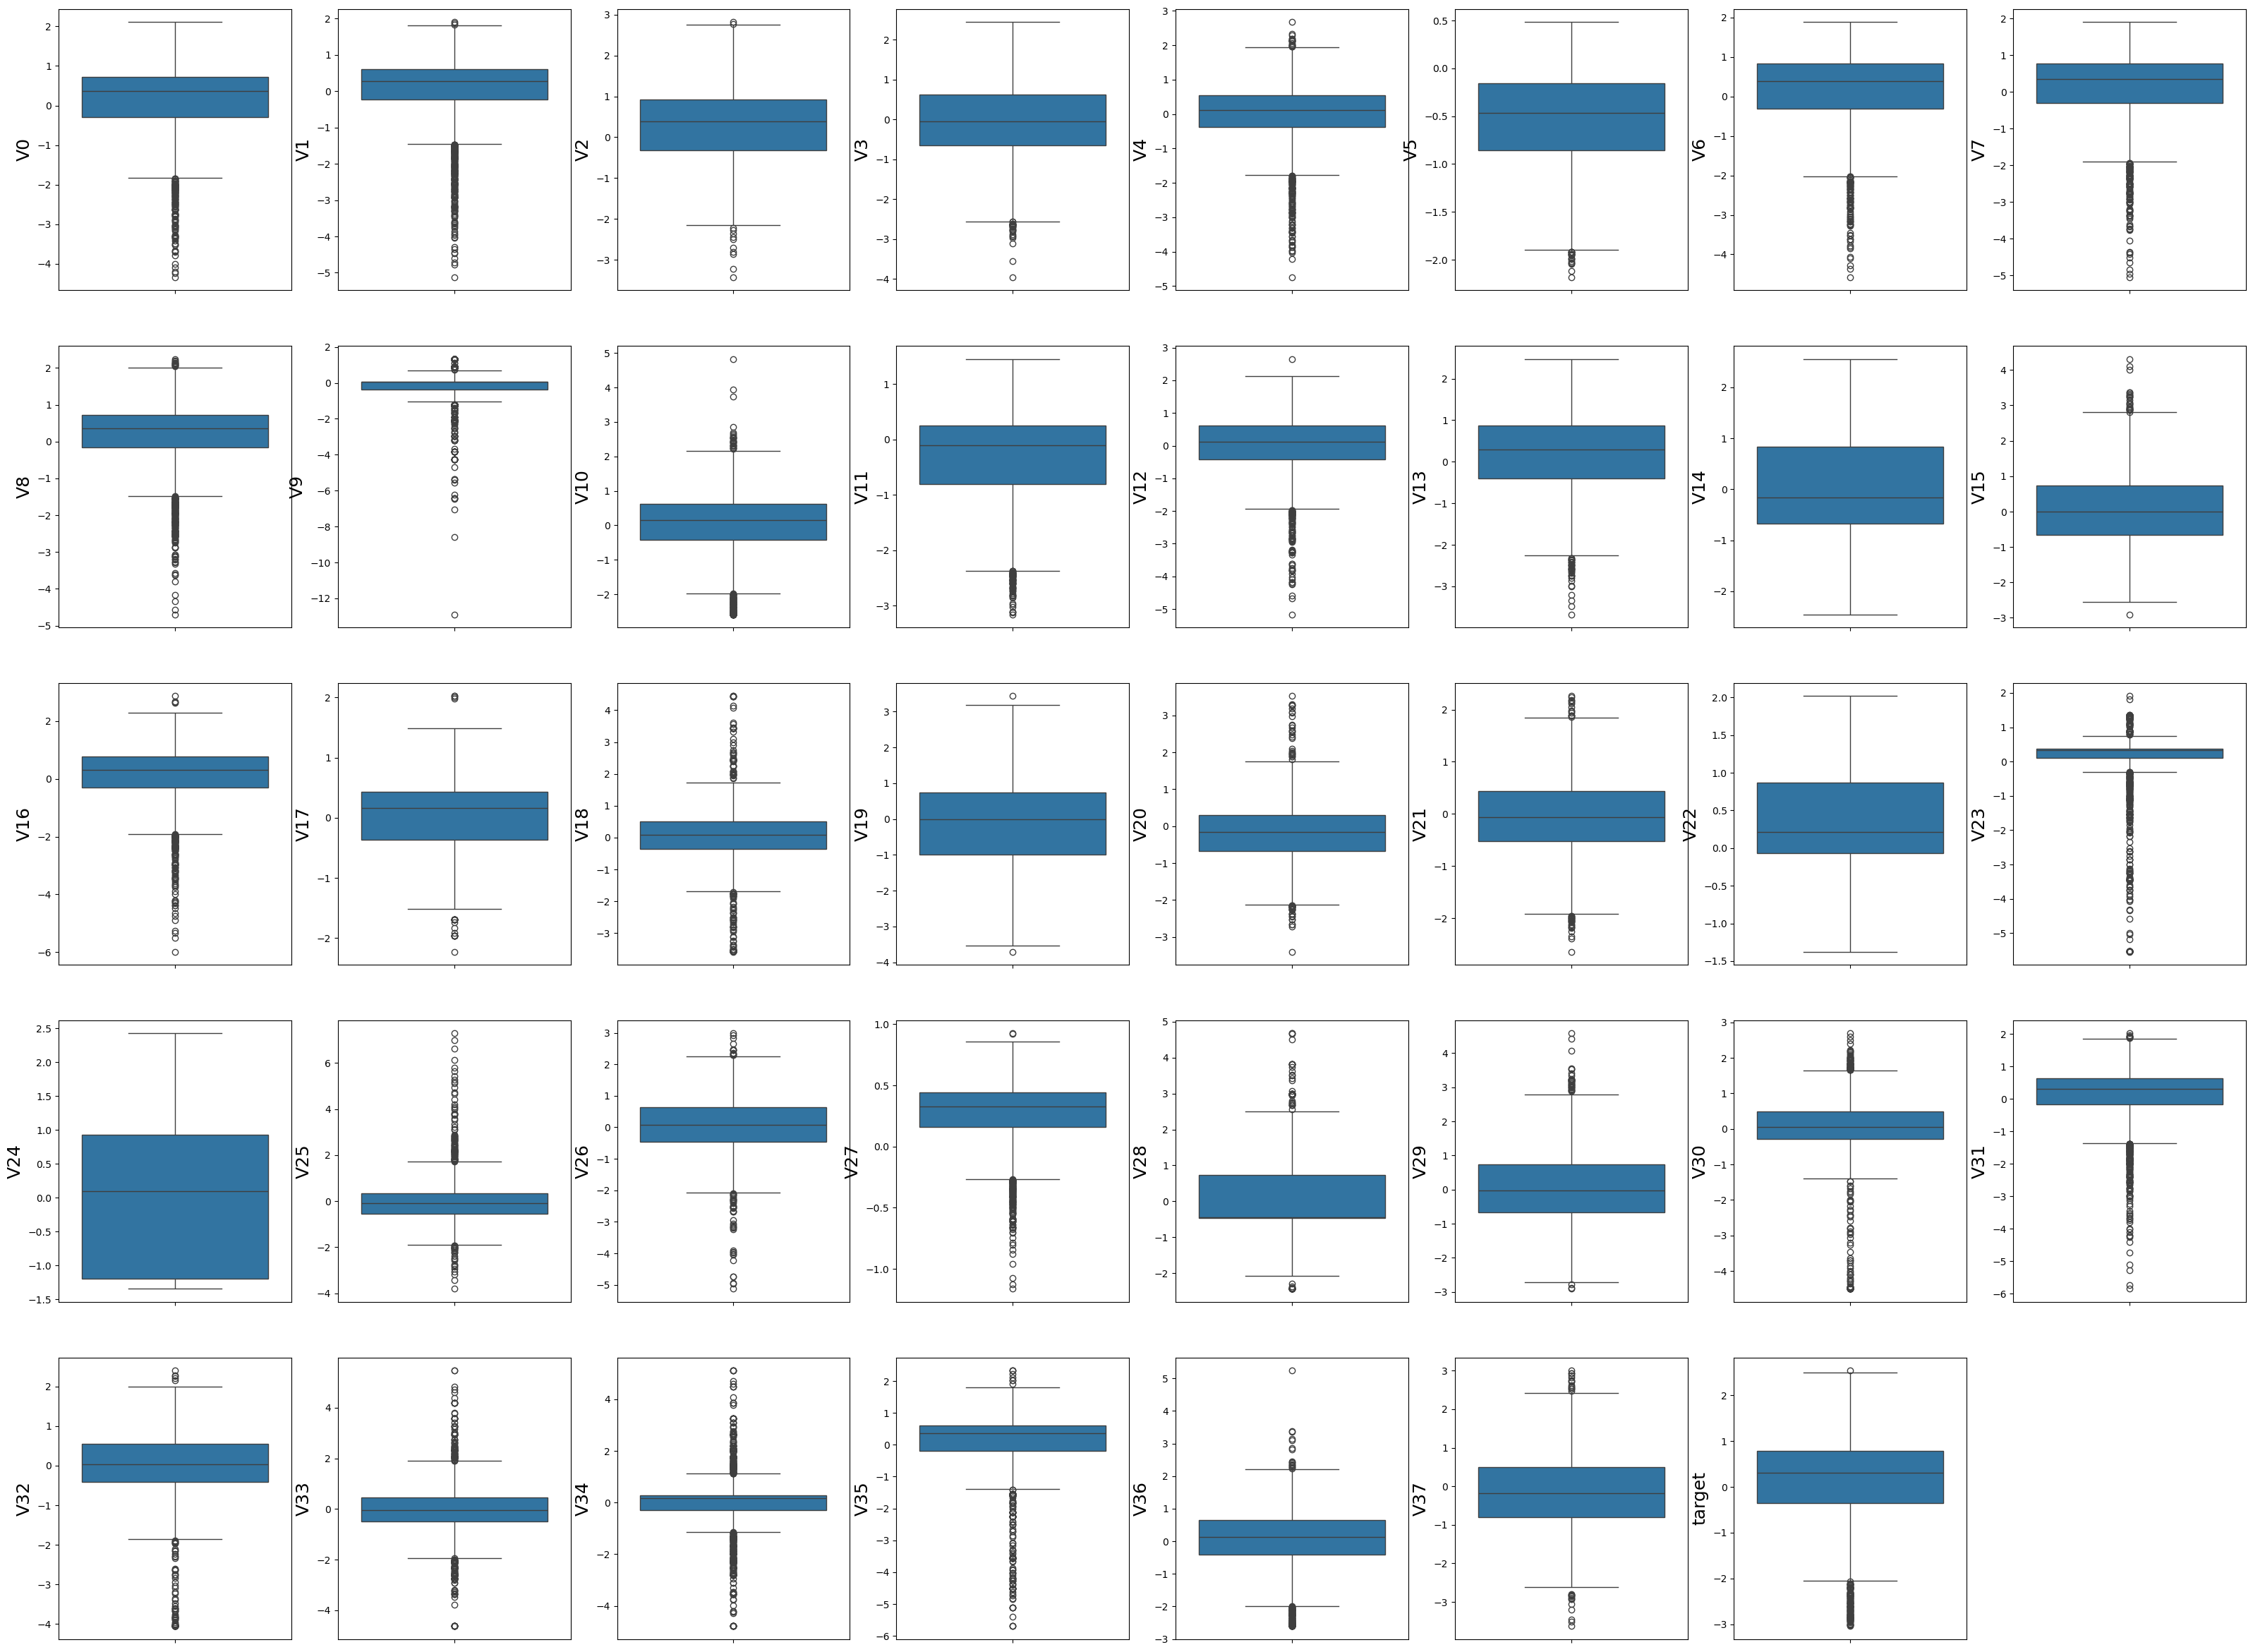

In [6]:
# 39 个特征，画布设置为 5*8
cols = train.columns
i = 0 # 子图的下标

plt.figure(figsize=(40, 30))
for col in cols:
    i = i + 1
    plt.subplot(5, 8, i)
    # 绘制箱线图
    sns.boxplot(train[col])
    plt.ylabel(col, fontsize=18)
plt.show()


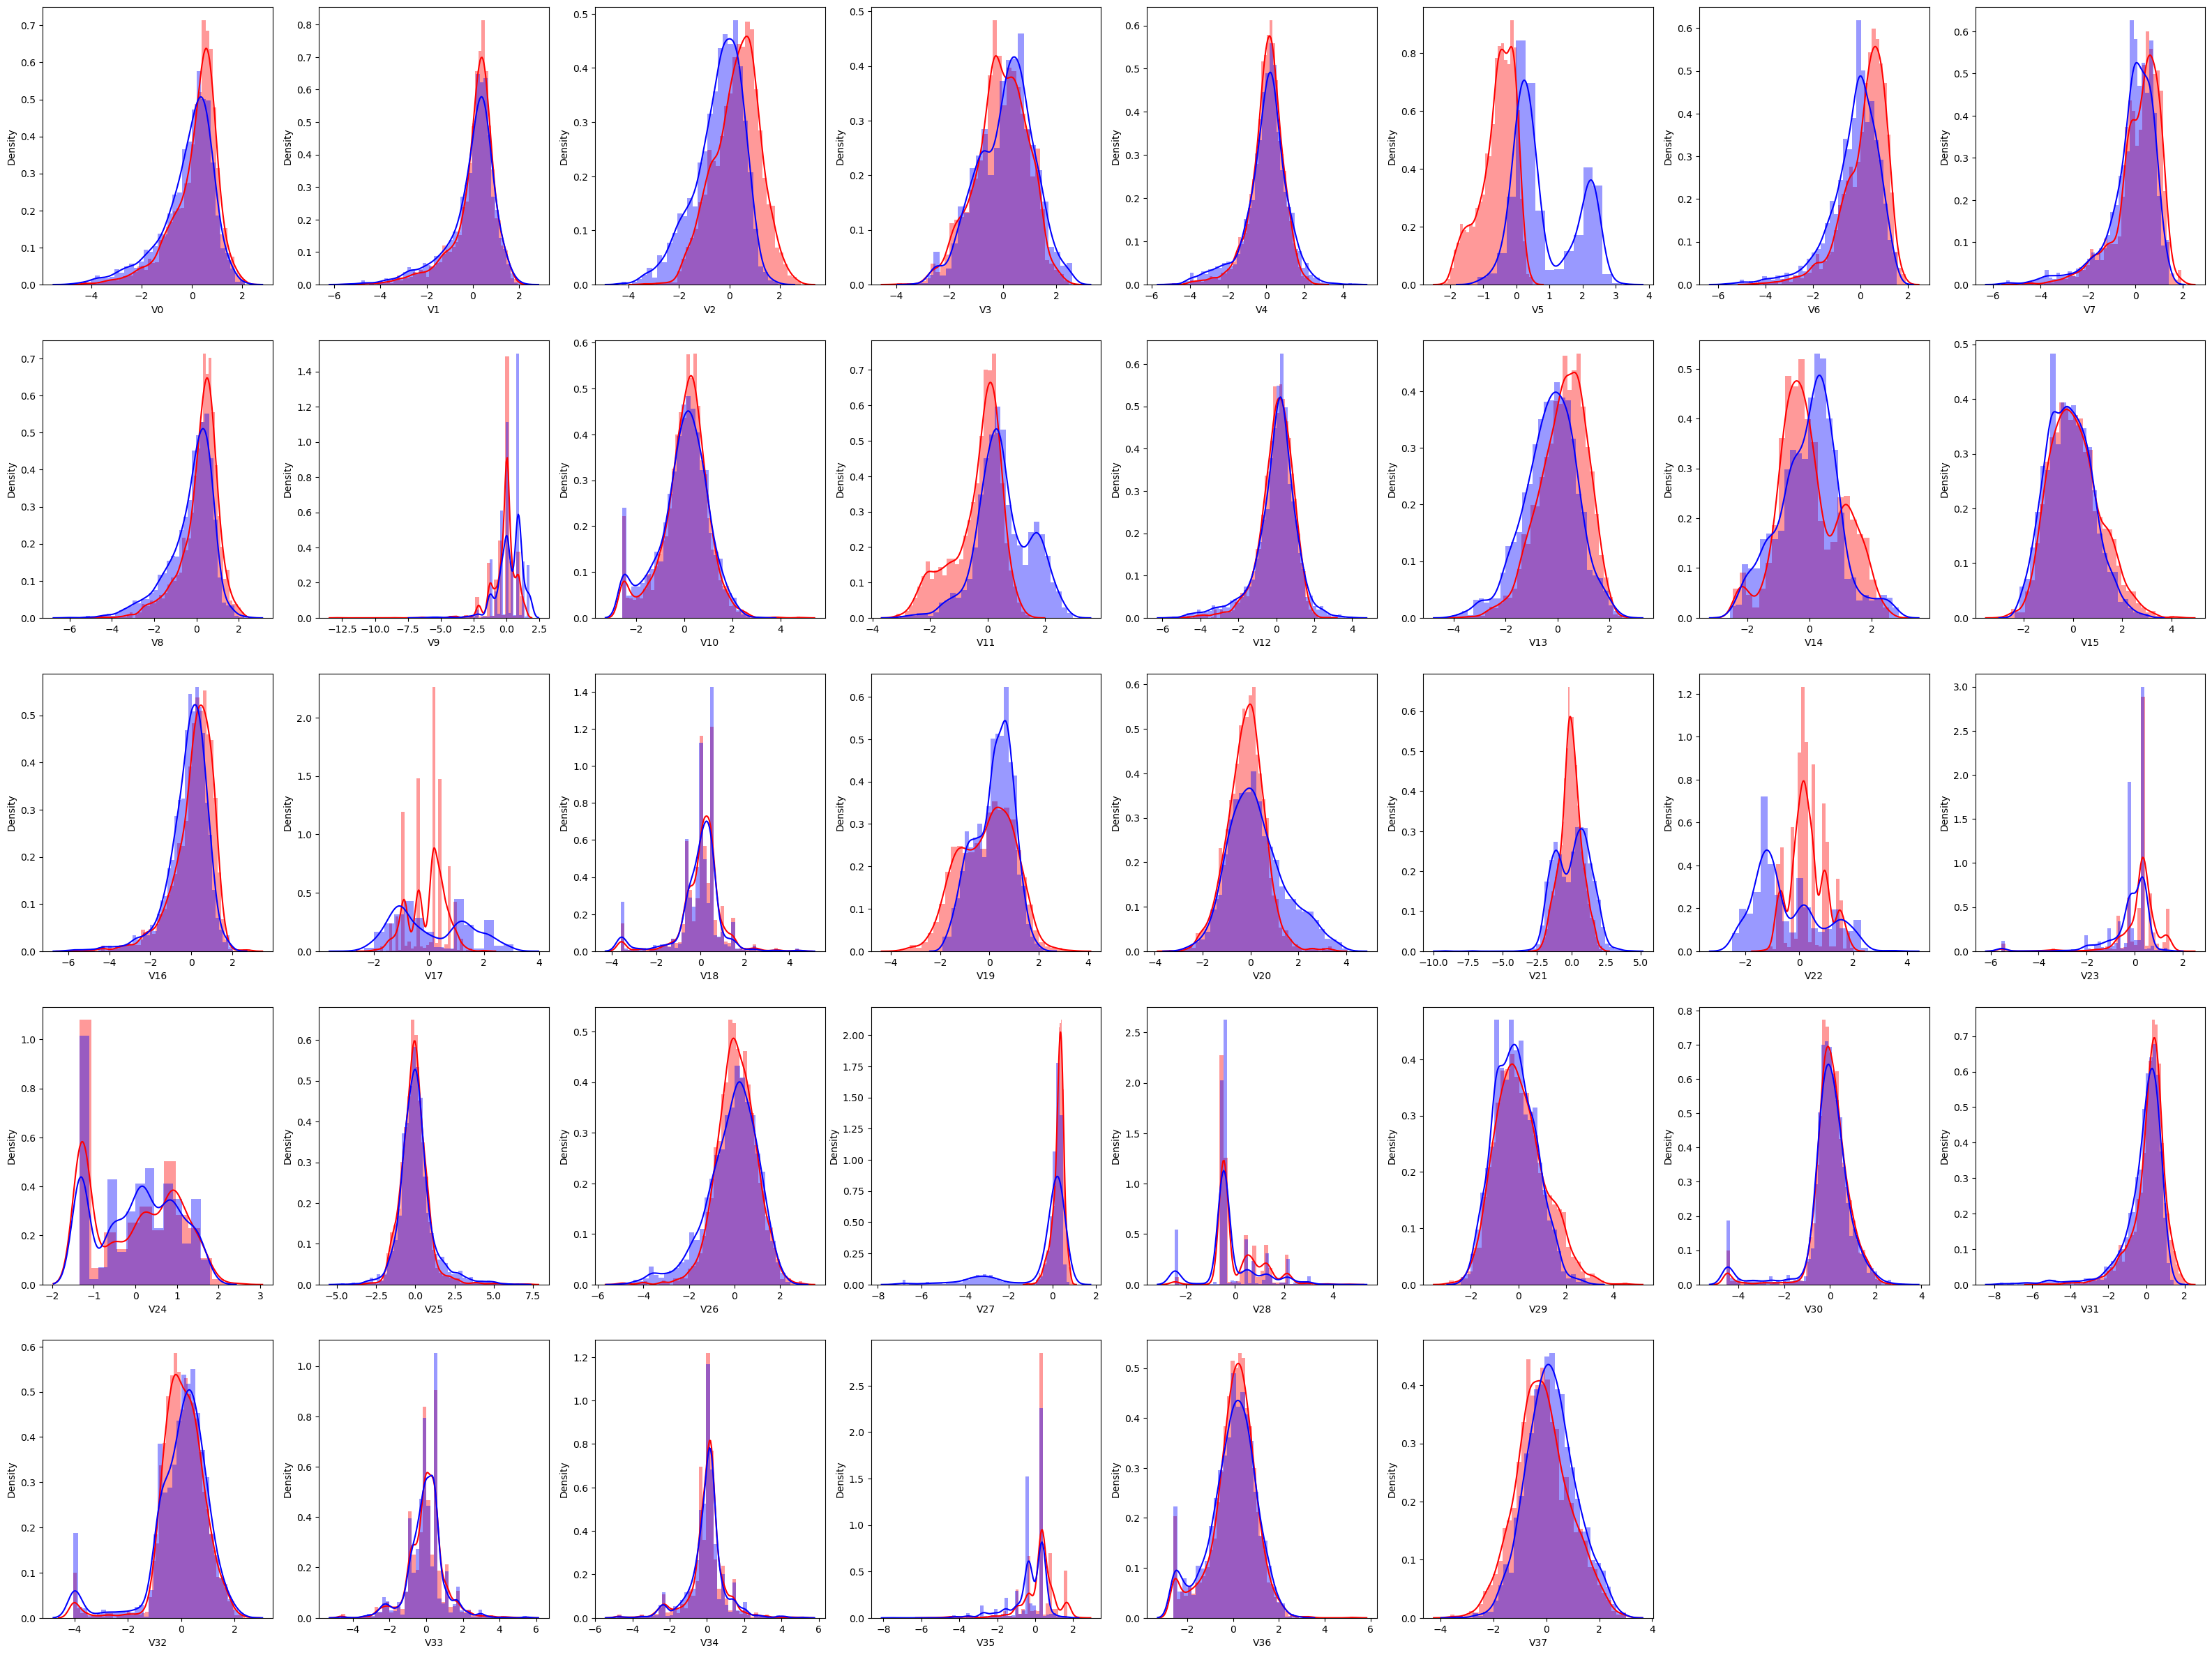

In [7]:
plt.figure(figsize=(40, 30))
i = 0
for col in cols[:-1]: # 不包括 target
    i = i + 1
    fig = plt.subplot(5, 8, i)
    # 绘制直方图
    sns.distplot(train[col], color='red', ax=fig, label='Train')
    sns.distplot(test[col], color='blue', ax=fig, label='Test')
plt.show()

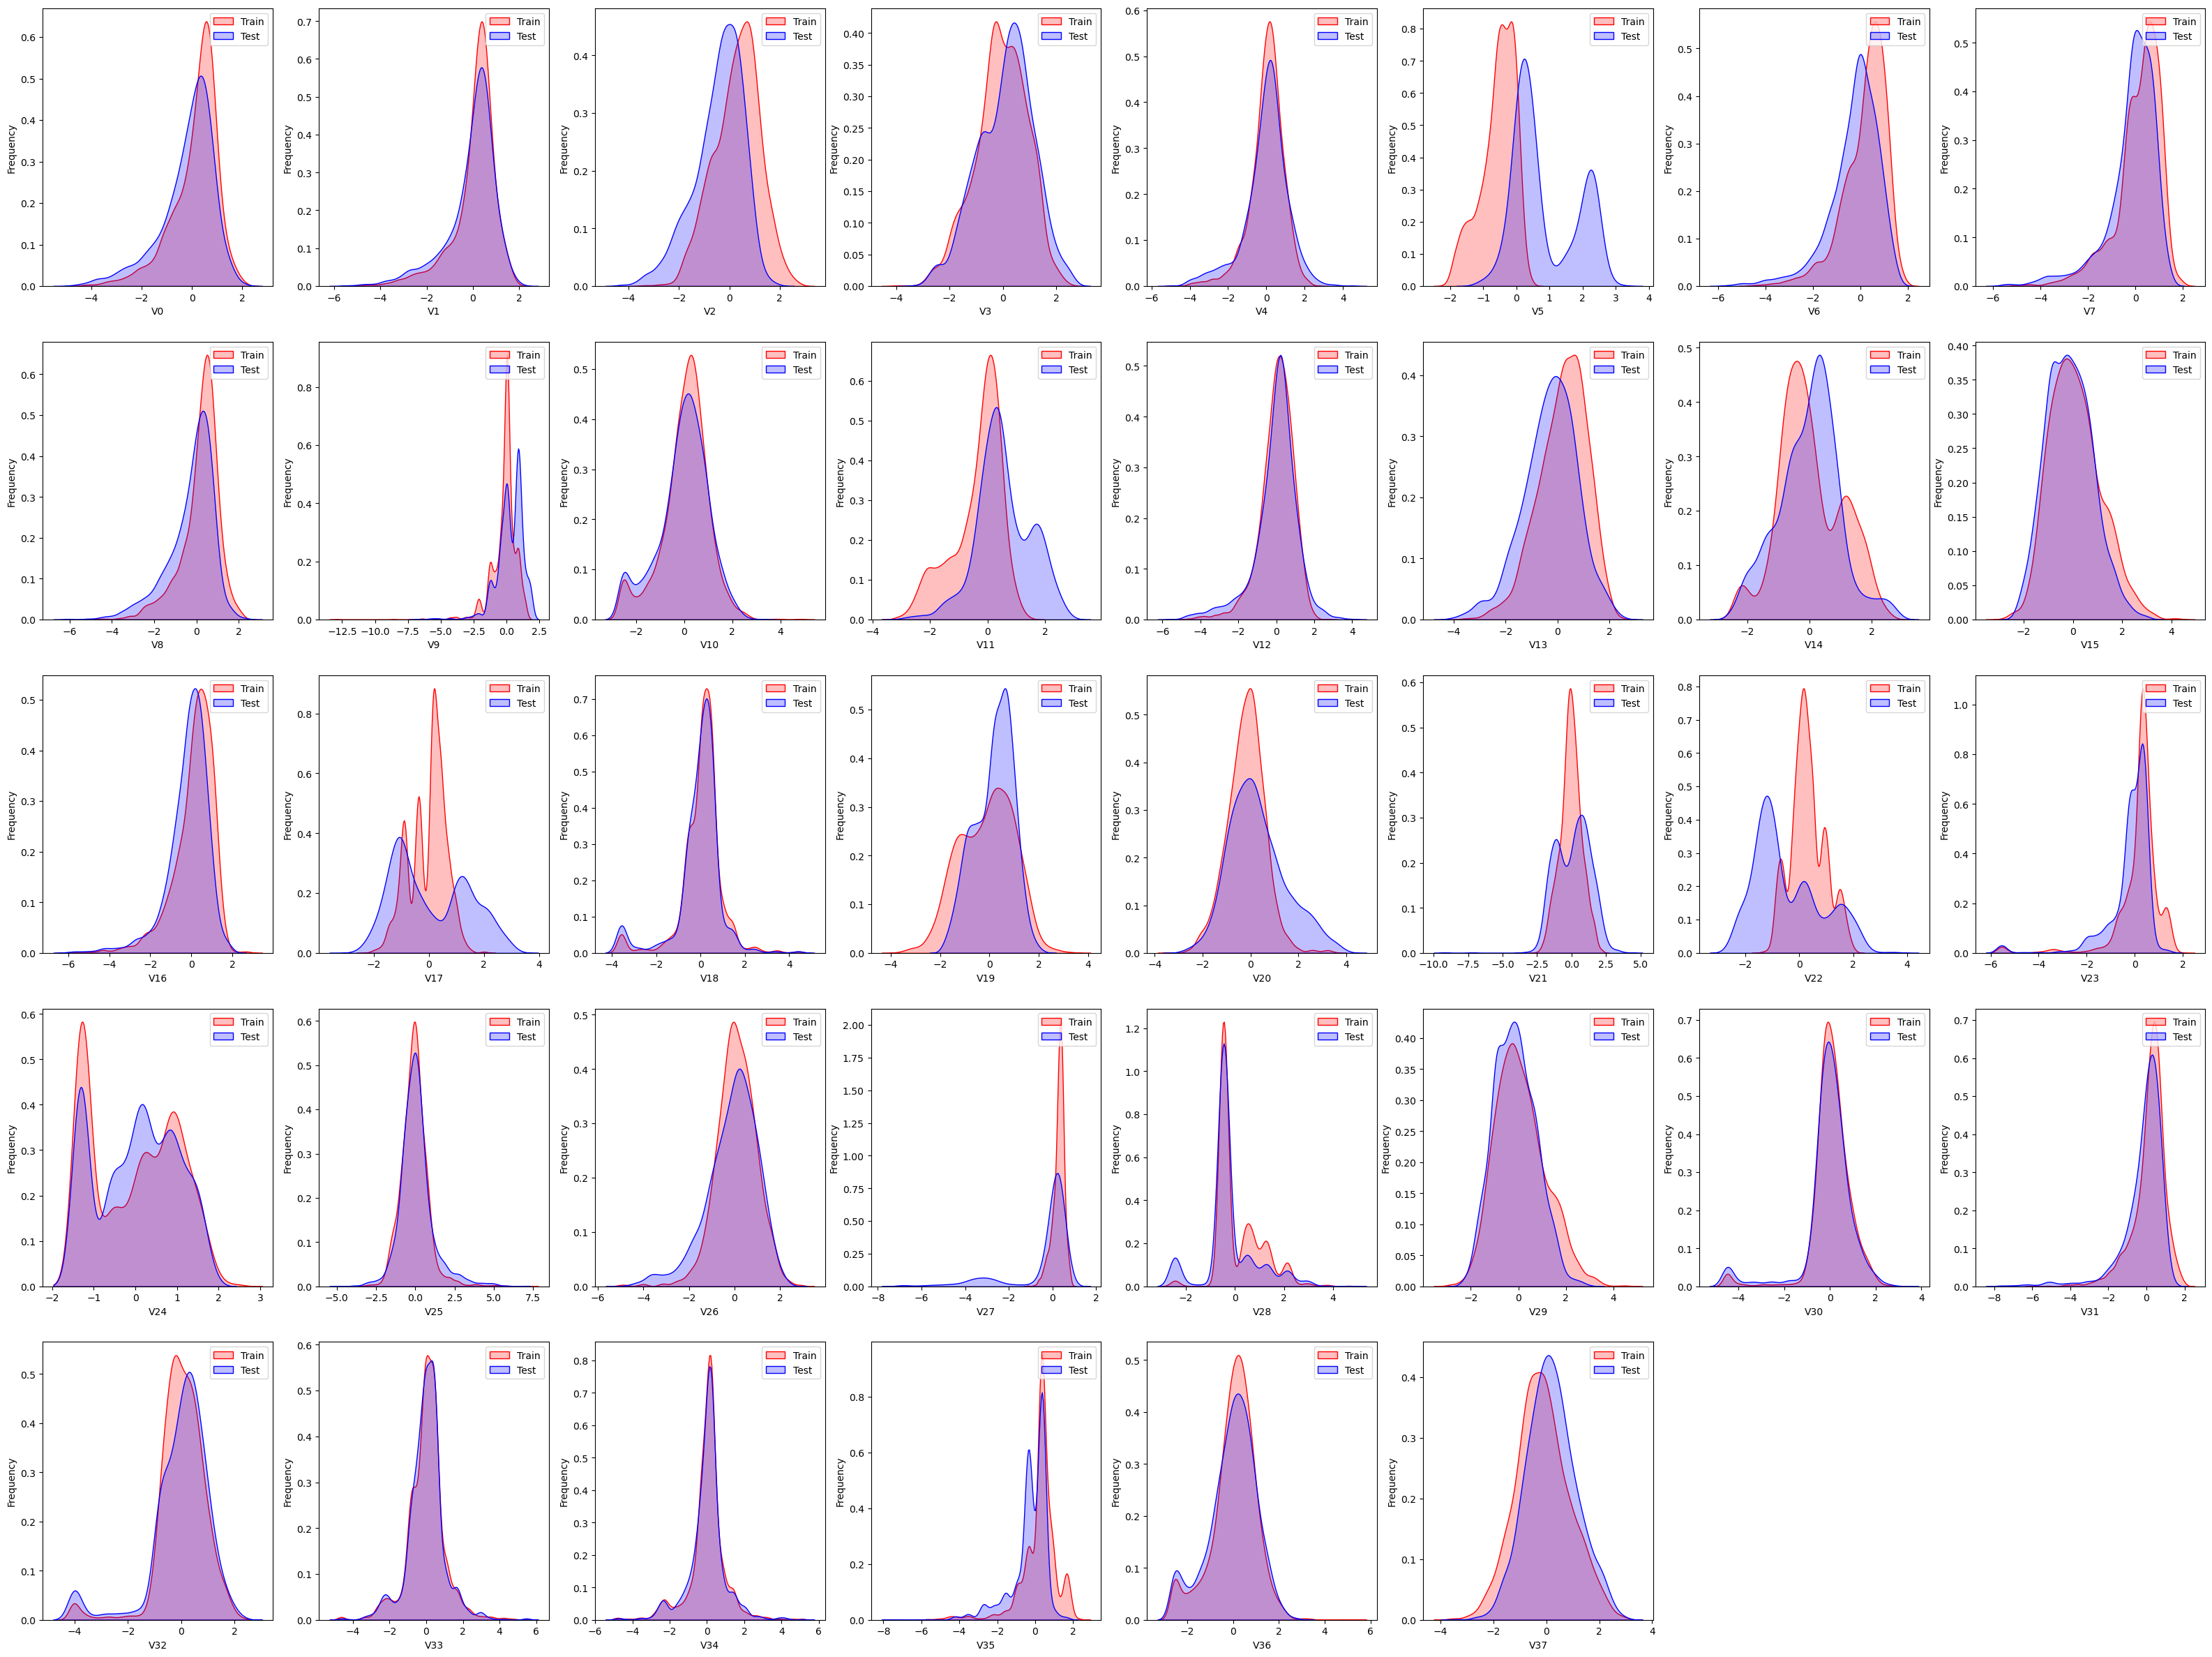

In [8]:
# 使用 kdeplot
plt.figure(figsize=(40, 30))
i = 0
for col in cols[:-1]: # 不包括 target
    i = i + 1
    fig = plt.subplot(5, 8, i)
    # 绘制直方图
    sns.kdeplot(train[col], color='red', ax=fig, label='Train', shade=True)
    sns.kdeplot(test[col], color='blue', ax=fig, label='Test', shade=True)
    plt.legend()
    fig.set_xlabel(col)
    fig.set_ylabel('Frequency')
plt.show()

In [9]:
drop_cols = ['V5', 'V9', 'V11', 'V17', 'V21', 'V22', 'V28']
train2 = train.drop(drop_cols, axis=1)
test2 = test.drop(drop_cols, axis=1)
train2

V0     V1     V2     V3     V4     V6     V7     V8    V10    V12  \
0     0.566  0.016 -0.143  0.407  0.452 -1.812 -2.360 -0.436 -0.940 -0.073   
1     0.968  0.437  0.066  0.566  0.194 -1.566 -2.360  0.332  0.188 -0.134   
2     1.013  0.568  0.235  0.370  0.112 -1.367 -2.360  0.396  0.874 -0.072   
3     0.733  0.368  0.283  0.165  0.599 -1.200 -2.086  0.403  0.011 -0.014   
4     0.684  0.638  0.260  0.209  0.337 -1.073 -2.086  0.314 -0.251  0.199   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
2883  0.190 -0.025 -0.138  0.161  0.600  0.757  0.584 -0.026  0.355  0.436   
2884  0.507  0.557  0.296  0.183  0.530  0.749  0.584  0.537 -0.061  0.414   
2885 -0.394 -0.721 -0.485  0.084  0.136  0.655  0.614 -0.818  0.240 -0.185   
2886 -0.219 -0.282 -0.344 -0.049  0.449  0.560  0.583 -0.596 -0.395 -0.053   
2887  0.368  0.380 -0.225 -0.049  0.379  0.550  0.551  0.244 -0.419  0.346   

      ...    V29    V30    V31    V32    V33    V34    V35    V36    V37  \
0     ...  0.136  0.109 -0.615  0.327 -4.627 -4.789 -5.101 -2.608 -3.508   
1     ... -0.128  0.124  0.032  0.600 -0.843  0.160  0.364 -0.335 -0.730   
2     ... -0.009  0.361  0.277 -0.116 -0.843  0.160  0.364  0.765 -0.589   
3     ...  0.015  0.417  0.279  0.603 -0.843 -0.065  0.364  0.333 -0.112   
4     ...  0.183  1.078  0.328  0.418 -0.843 -0.215  0.364 -0.280 -0.028   
...   ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
2883  ...  0.128 -0.208  0.809 -0.173  0.247 -0.027 -0.349  0.576  0.686   
2884  ...  0.291 -0.287  0.465 -0.310  0.763  0.498 -0.349 -0.615 -0.380   
2885  ...  0.291 -0.179  0.268  0.552  0.763  0.498 -0.349  0.951  0.748   
2886  ...  0.216  1.061 -0.051  1.023  0.878  0.610 -0.230 -0.301  0.555   
2887  ...  0.047  0.057 -0.042  0.847  0.534 -0.009 -0.190 -0.567  0.388   

      target  
0      0.175  
1      0.676  
2      0.633  
3      0.206  
4      0.384  
...      ...  
2883   0.235  
2884   1.042  
2885   0.005  
2886   0.350  
2887   0.417  

[2888 rows x 32 columns]

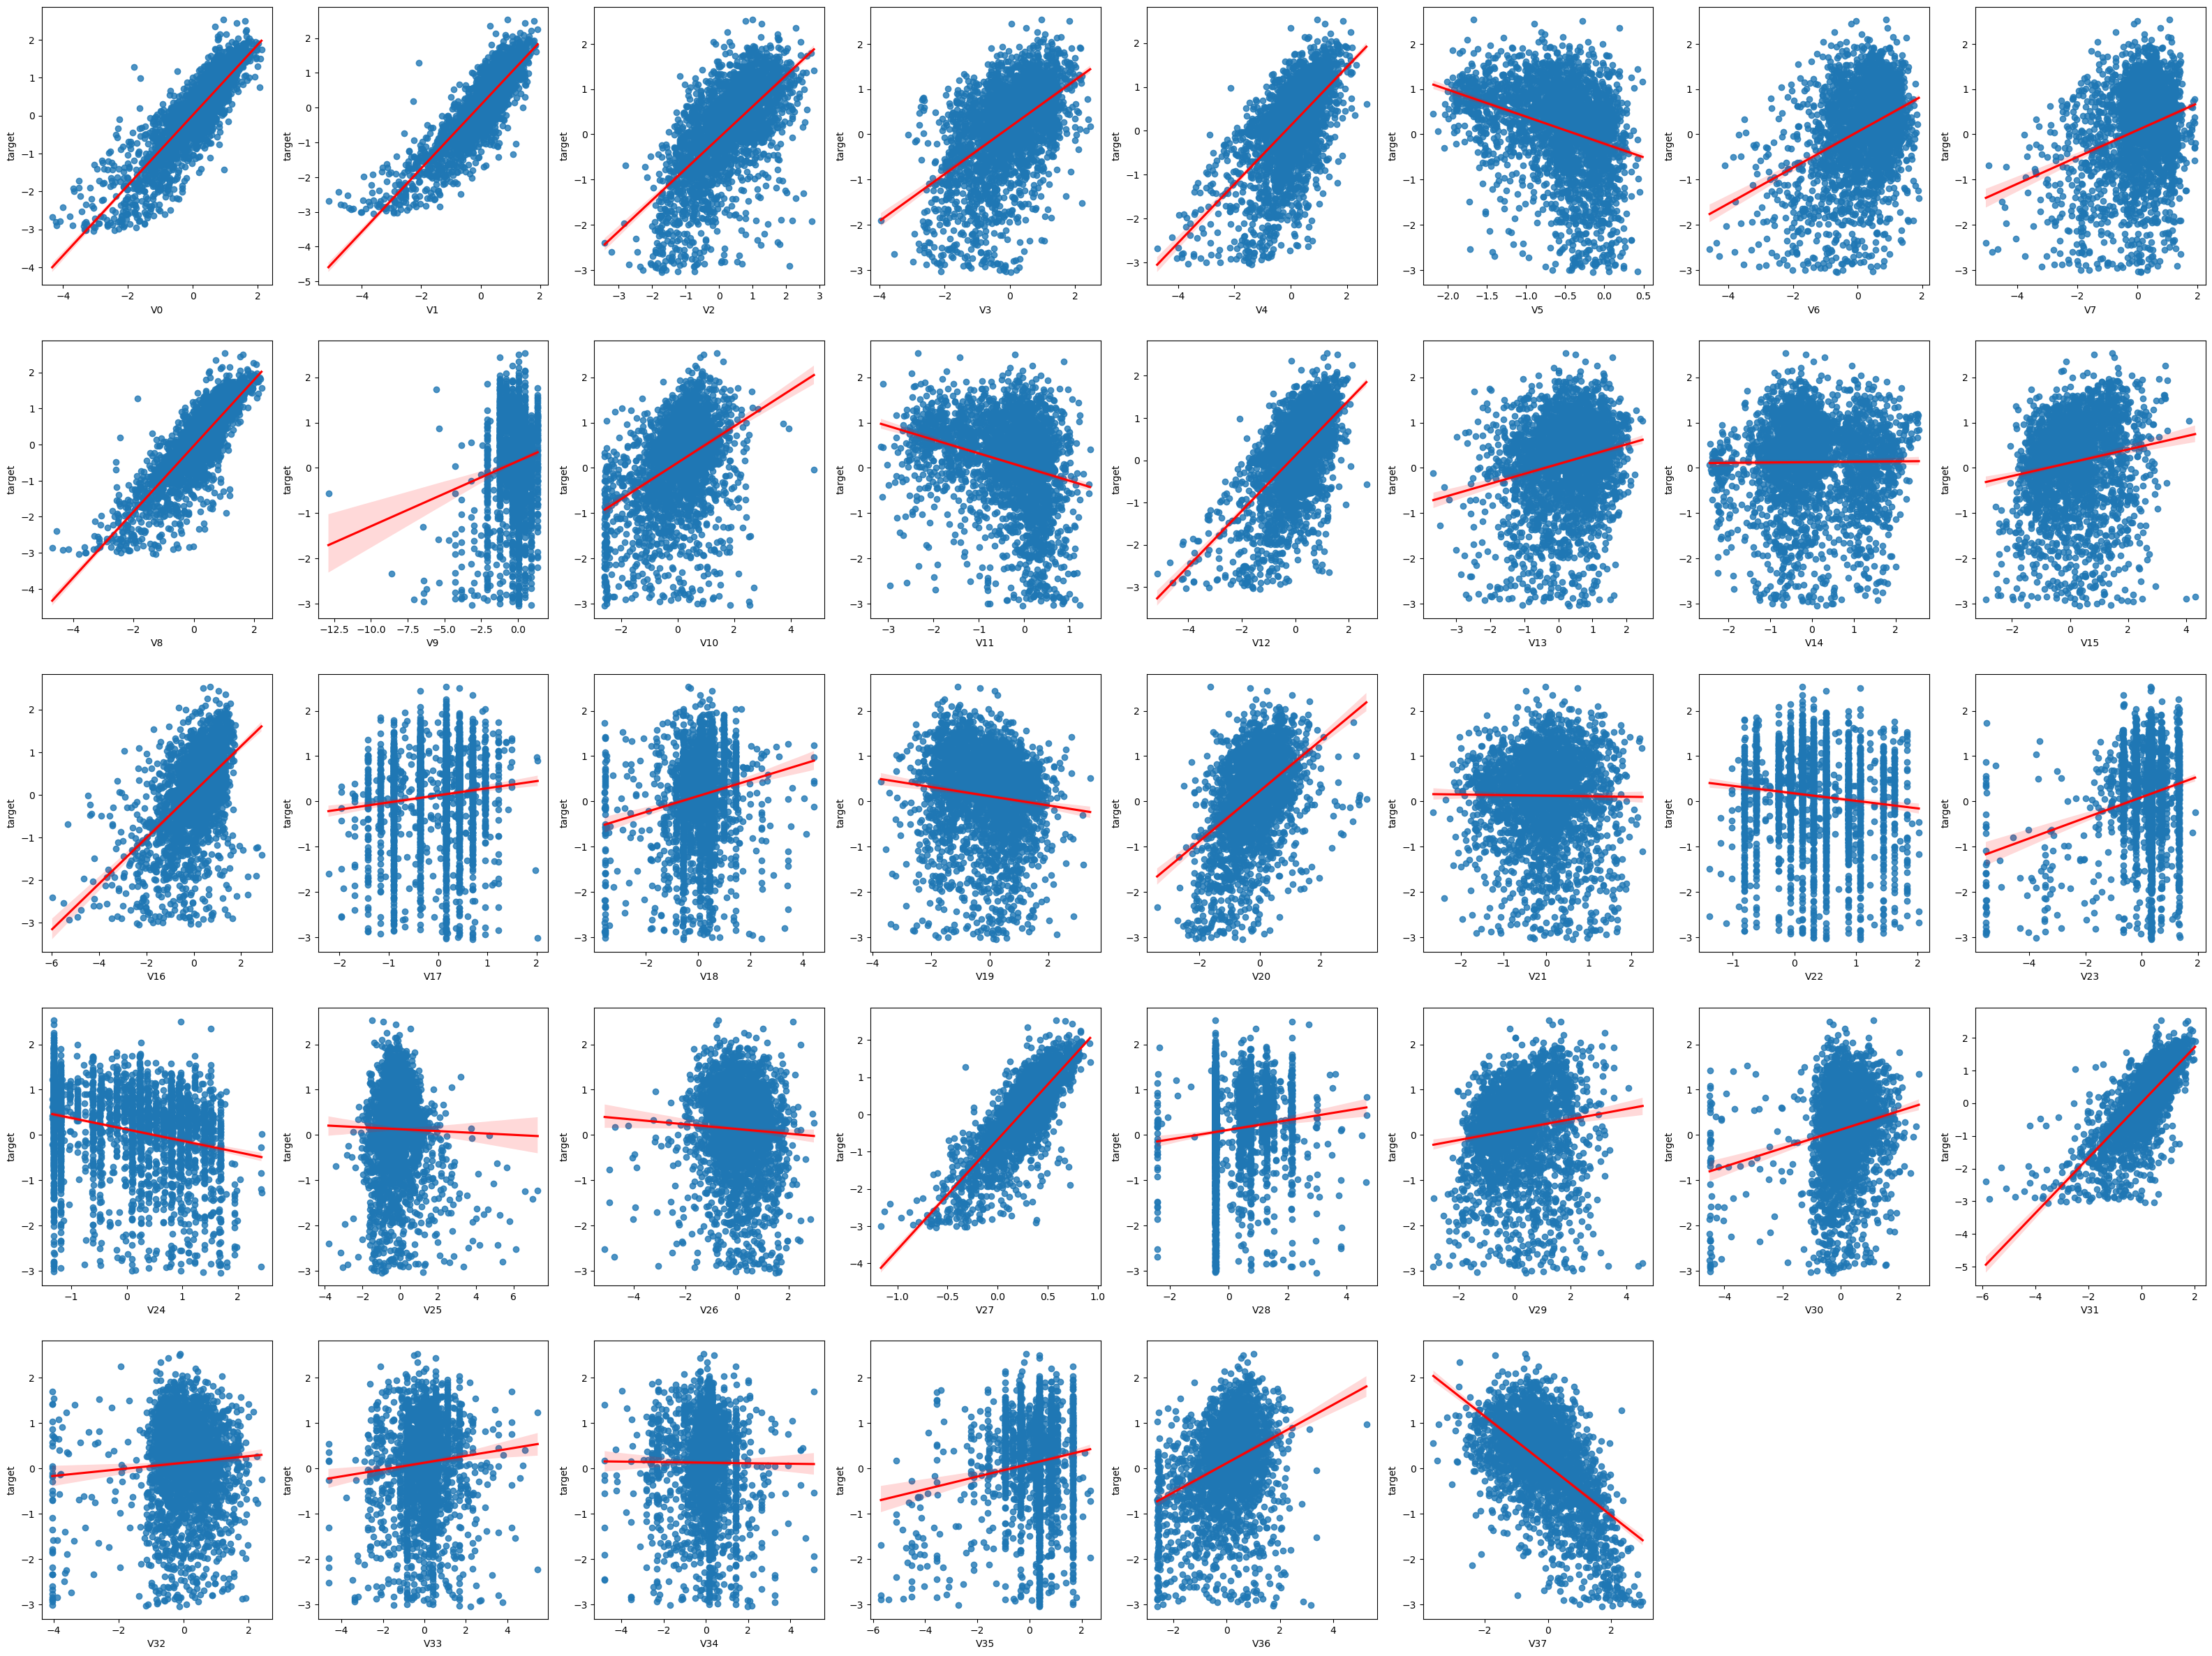

In [10]:
# 绘制所有特征和 target 之间的回归关系
plt.figure(figsize=(40, 30))
i = 0
for col in cols[:-1]:
    i = i + 1
    fig = plt.subplot(5, 8, i)
    sns.regplot(x=col, y='target', data=train, ax=fig, line_kws={'color':'red'})
plt.show()

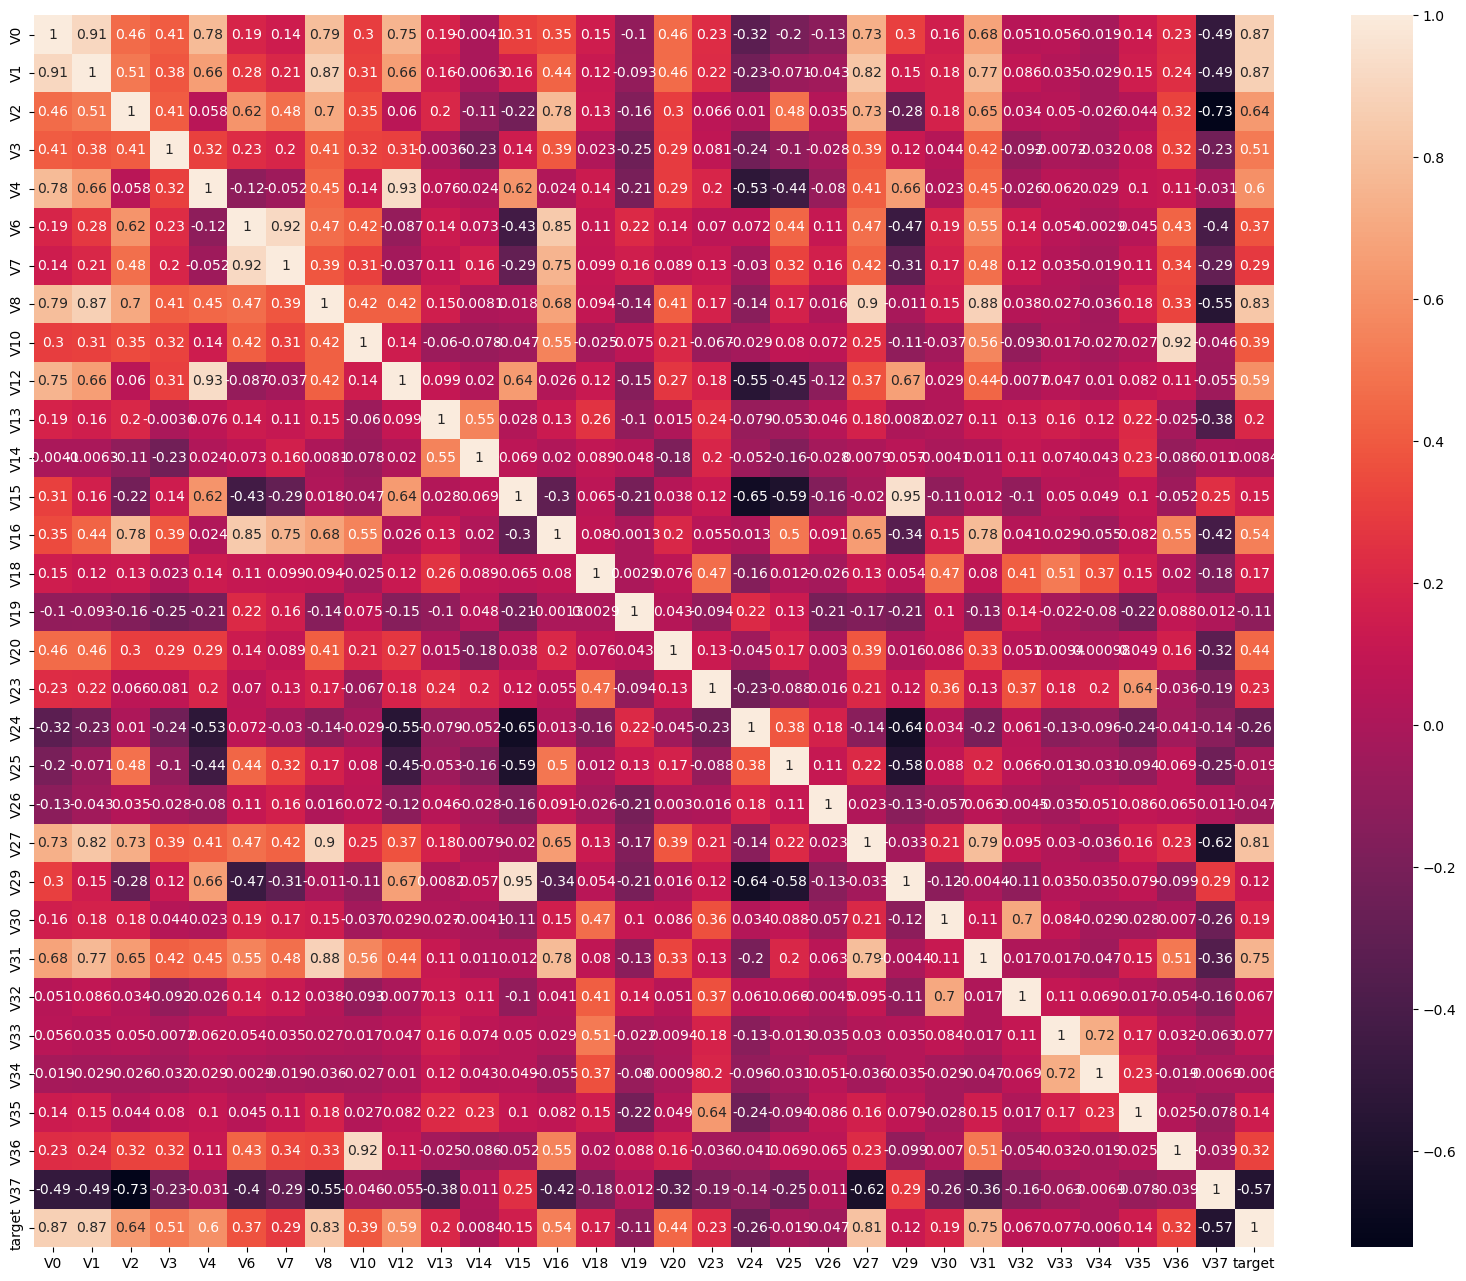

In [11]:
# 绘制相关性系数的热力图
plt.figure(figsize=(20, 16))
sns.heatmap(train2.corr(), annot=True)
plt.show()

In [12]:
# 筛选出来重要的特征，即绝对值 > 0.5
threshold = 0.5
corrs = train2.corr()
# 找到重要的特征
features_filter = corrs.index[abs(corrs['target']) > threshold]
features_filter

Index(['V0', 'V1', 'V2', 'V3', 'V4', 'V8', 'V12', 'V16', 'V27', 'V31', 'V37',
       'target'],
      dtype='object')

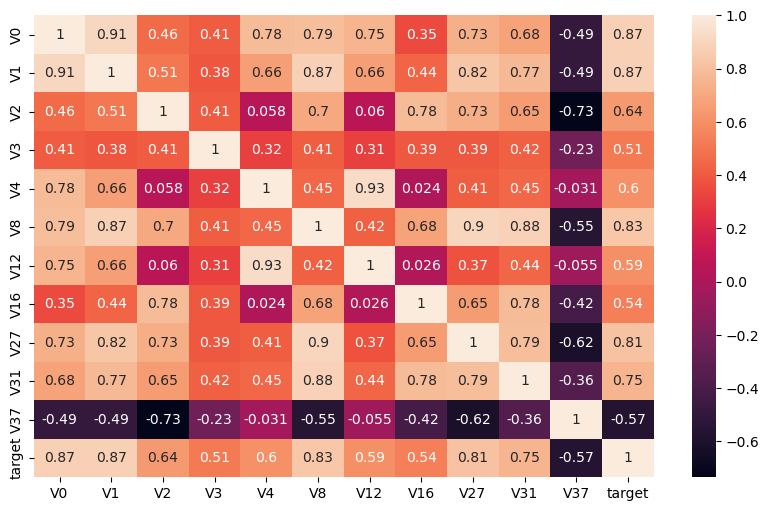

In [13]:
plt.figure(figsize=(10, 6))
sns.heatmap(train[features_filter].corr(), annot=True)
plt.show()

In [14]:
features_filter = features_filter.tolist()
features_filter.remove('target')
print(features_filter)

['V0', 'V1', 'V2', 'V3', 'V4', 'V8', 'V12', 'V16', 'V27', 'V31', 'V37']


In [15]:
# 数据归一化处理
ss = StandardScaler()
# 训练集的数据归一化
train[features_filter] = ss.fit_transform(train[features_filter])
# 训练集的数据归一化
test[features_filter] = ss.transform(test[features_filter])

In [16]:
# 模型创建，线性回归
model = LinearRegression()
# 模型训练
model.fit(train[features_filter], train['target'])
# 模型预测
y_pred = model.predict(test[features_filter])
y_pred

array([ 0.1882987 ,  0.18832828, -0.18362167, ..., -3.60895997,
       -3.58667469, -3.30277726])

In [17]:
y_pred = pd.DataFrame(y_pred)
y_pred.to_csv(data_path + 'Zhengqi/baseline.txt', index=False, header=None)

In [18]:
train['target'].value_counts()

target
 0.451    7
 0.817    7
 0.669    7
 0.493    6
 0.347    6
         ..
-0.658    1
-1.107    1
-1.840    1
-3.005    1
 0.350    1
Name: count, Length: 1916, dtype: int64